In [1]:
import numpy as np
import pandas as pd 

In [2]:
df = pd.read_csv('./sampled_dataset2.csv')

In [3]:
pd.set_option('display.max_columns', None)
df.describe(include='all')

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Connection Type,Label
count,190211,190211,190211.000000,190211,190211.000000,190211.000000,1.902110e+05,190211.000000,190211.000000,1.902110e+05,1.902110e+05,190211.000000,190211.000000,190211.000000,190211.000000,190211.000000,190211.000000,190211.000000,190211.000000,1.902110e+05,1.902110e+05,1.902110e+05,1.902110e+05,1.902110e+05,1.902110e+05,1.902110e+05,1.902110e+05,1.902110e+05,1.902110e+05,1.902110e+05,1.902110e+05,1.902110e+05,1.902110e+05,190211.000000,190211.0,190211.000000,190211.0,1.902110e+05,1.902110e+05,1.902110e+05,1.902110e+05,190211.000000,190211.000000,190211.000000,190211.000000,1.902110e+05,190211.000000,190211.000000,190211.000000,190211.000000,190211.000000,190211.000000,190211.000000,190211.000000,190211.000000,190211.000000,190211.000000,190211.000000,190211.0,190211.0,190211.0,1.902110e+05,190211.000000,1.902110e+05,190211.000000,190211.000000,190211.0,190211.000000,190211.000000,190211.000000,190211.000000,190211.000000,1.902110e+05,1.902110e+05,1.902110e+05,1.902110e+05,1.902110e+05,1.902110e+05,1.902110e+05,1.902110e+05,190211,190211.000000
unique,139656,16767,NaN,11746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,8.6.0.1-8.0.6.4-0-0-0,192.168.1.45,NaN,192.168.1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wired,NaN
freq,1098,64961,NaN,38981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107795,NaN
mean,NaN,NaN,36203.387459,NaN,13924.351993,7.682174,7.164918e+06,9.137700,9.574783,8.695839e+03,3.880422e+04,198.034115,20.906782,59.958886,66.548512,287.334875,22.359469,84.550781,85.768829,2.310677e+06,1.151016e+06,4.171265e+06,1.616112e+06,7.045843e+06,3.042429e+06,6.921109e+05,4.097932e+06,2.613944e+06,3.918137e+06,1.584536e+06,2.893052e+05,2.091930e+06,1.391927e+06,0.097444,0.0,0.000205,0.0,2.617918e+02,2.722460e+02,3.726581e+04,4.103712e+03,19.493326,402.022906,75.276619,99.127437,1.611371e+05,0.142116,0.554532,0.353539,4.699507,15.758410,0.000442,0.000100,0.000137,0.623176,87.623693,

In [4]:
df.shape

(1902116, 82)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1902116 entries, 0 to 1902115
Data columns (total 82 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Flow ID                     object 
 1   Src IP                      object 
 2   Src Port                    int64  
 3   Dst IP                      object 
 4   Dst Port                    int64  
 5   Protocol                    int64  
 6   Flow Duration               int64  
 7   Total Fwd Packet            int64  
 8   Total Bwd packets           int64  
 9   Total Length of Fwd Packet  float64
 10  Total Length of Bwd Packet  float64
 11  Fwd Packet Length Max       float64
 12  Fwd Packet Length Min       float64
 13  Fwd Packet Length Mean      float64
 14  Fwd Packet Length Std       float64
 15  Bwd Packet Length Max       float64
 16  Bwd Packet Length Min       float64
 17  Bwd Packet Length Mean      float64
 18  Bwd Packet Length Std       float64
 19  Flow IAT Mean        

In [3]:
features = df.columns.tolist()

In [4]:
features.remove("Label")
features.remove("Flow ID")
features.remove("Src IP")
features.remove("Dst IP")
features.remove("Connection Type")

In [5]:
X = df[features]
y= df["Label"]

Train Test Split 

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(1521692, 77) (1521692,)
(380424, 77) (380424,)


Feature Standardization

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Using RFECV for Feature Selection

In [8]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

In [13]:
!pip install lightgbm
import lightgbm as lgb

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/d9/28/3be76b591a2e14a031b681b8283acf1dec2ad521f6f1701b7957df68c466/lightgbm-4.5.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.4 MB 825.8 kB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.4 MB 871.5 kB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.4 MB 722.1 kB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.4 MB 1.1 MB/s eta 0:00:02
   -------- ------------------------------- 0.3/1.4 MB 1.2 MB/s eta 0:00:01
   ---------- ----------------------------- 0.4/1.4 MB 1.3 MB/s eta 0:00:01
   ------------ --------------------------- 0.4/1.4 MB 1.3 MB/s eta 0:00:01
   -------------- ------------------------- 0.5/1.4 MB 1.3 MB/s eta 0:00:01
   ----------------- --------------------

In [14]:
# Define estimator
estimator = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1)

In [15]:
# Apply RFECV on training data only
rfecv = RFECV(estimator, step=5, cv=3, scoring='accuracy', n_jobs=-1)
rfecv.fit(X_train_scaled, y_train)

[LightGBM] [Info] Number of positive: 7238, number of negative: 7978
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005895 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13125
[LightGBM] [Info] Number of data points in the train set: 15216, number of used features: 67
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.475683 -> initscore=-0.097343
[LightGBM] [Info] Start training from score -0.097343
[LightGBM] [Info] Number of positive: 7238, number of negative: 7978
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001882 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12615
[LightGBM] [Info] Number of data points in the train set: 15216, number of used features: 65
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.475683 -> initscore=-0.097343
[Lig

RFECV(cv=3, estimator=LGBMClassifier(), n_jobs=-1, scoring='accuracy', step=5)

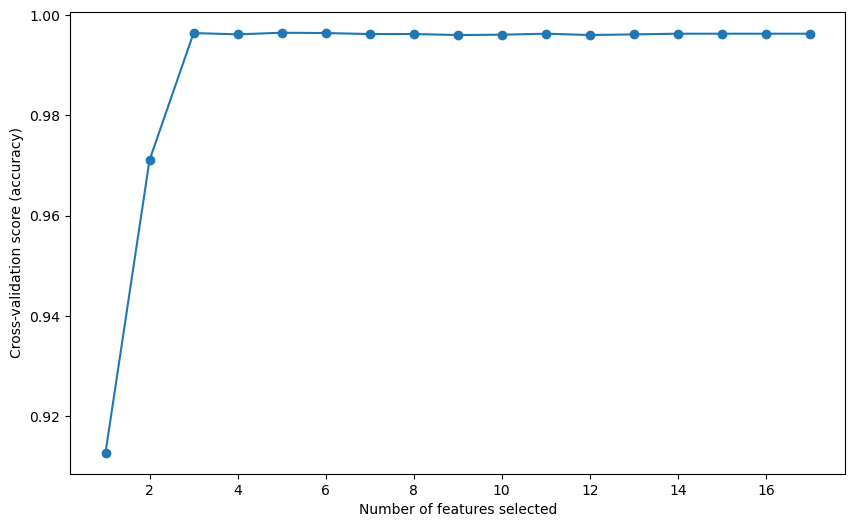

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (accuracy)")

# Use cv_results_ instead of grid_scores_
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'], marker='o')
plt.show()

In [23]:
# Store feature names before scaling
feature_names = X_train.columns  # Ensure this is a Pandas Index

# Print optimal number of features
print(f"Optimal number of features: {rfecv.n_features_}")

# Convert NumPy boolean mask to feature names
selected_features = feature_names[rfecv.support_]  # Index feature names
print(f"Selected features: {list(selected_features)}")

Optimal number of features: 17
Selected features: ['Src Port', 'Dst Port', 'Flow Duration', 'Total Length of Fwd Packet', 'Fwd Packet Length Min', 'Bwd Packet Length Max', 'Flow IAT Min', 'Fwd IAT Min', 'Fwd Header Length', 'Bwd Packets/s', 'Packet Length Max', 'Packet Length Std', 'RST Flag Count', 'FWD Init Win Bytes', 'Bwd Init Win Bytes', 'Idle Mean', 'Idle Max']


In [ ]:
# Transform both train and test sets using selected features
X_train_selected = rfecv.transform(X_train_scaled)
X_test_selected = rfecv.transform(X_test_scaled)